## 네이버 이미지 검색 결과 크롤링하기
이번에는 특정 키워드로 네이버에 이미지 검색을 요청했을 때의 결과를 크롤링 해보겠습니다.
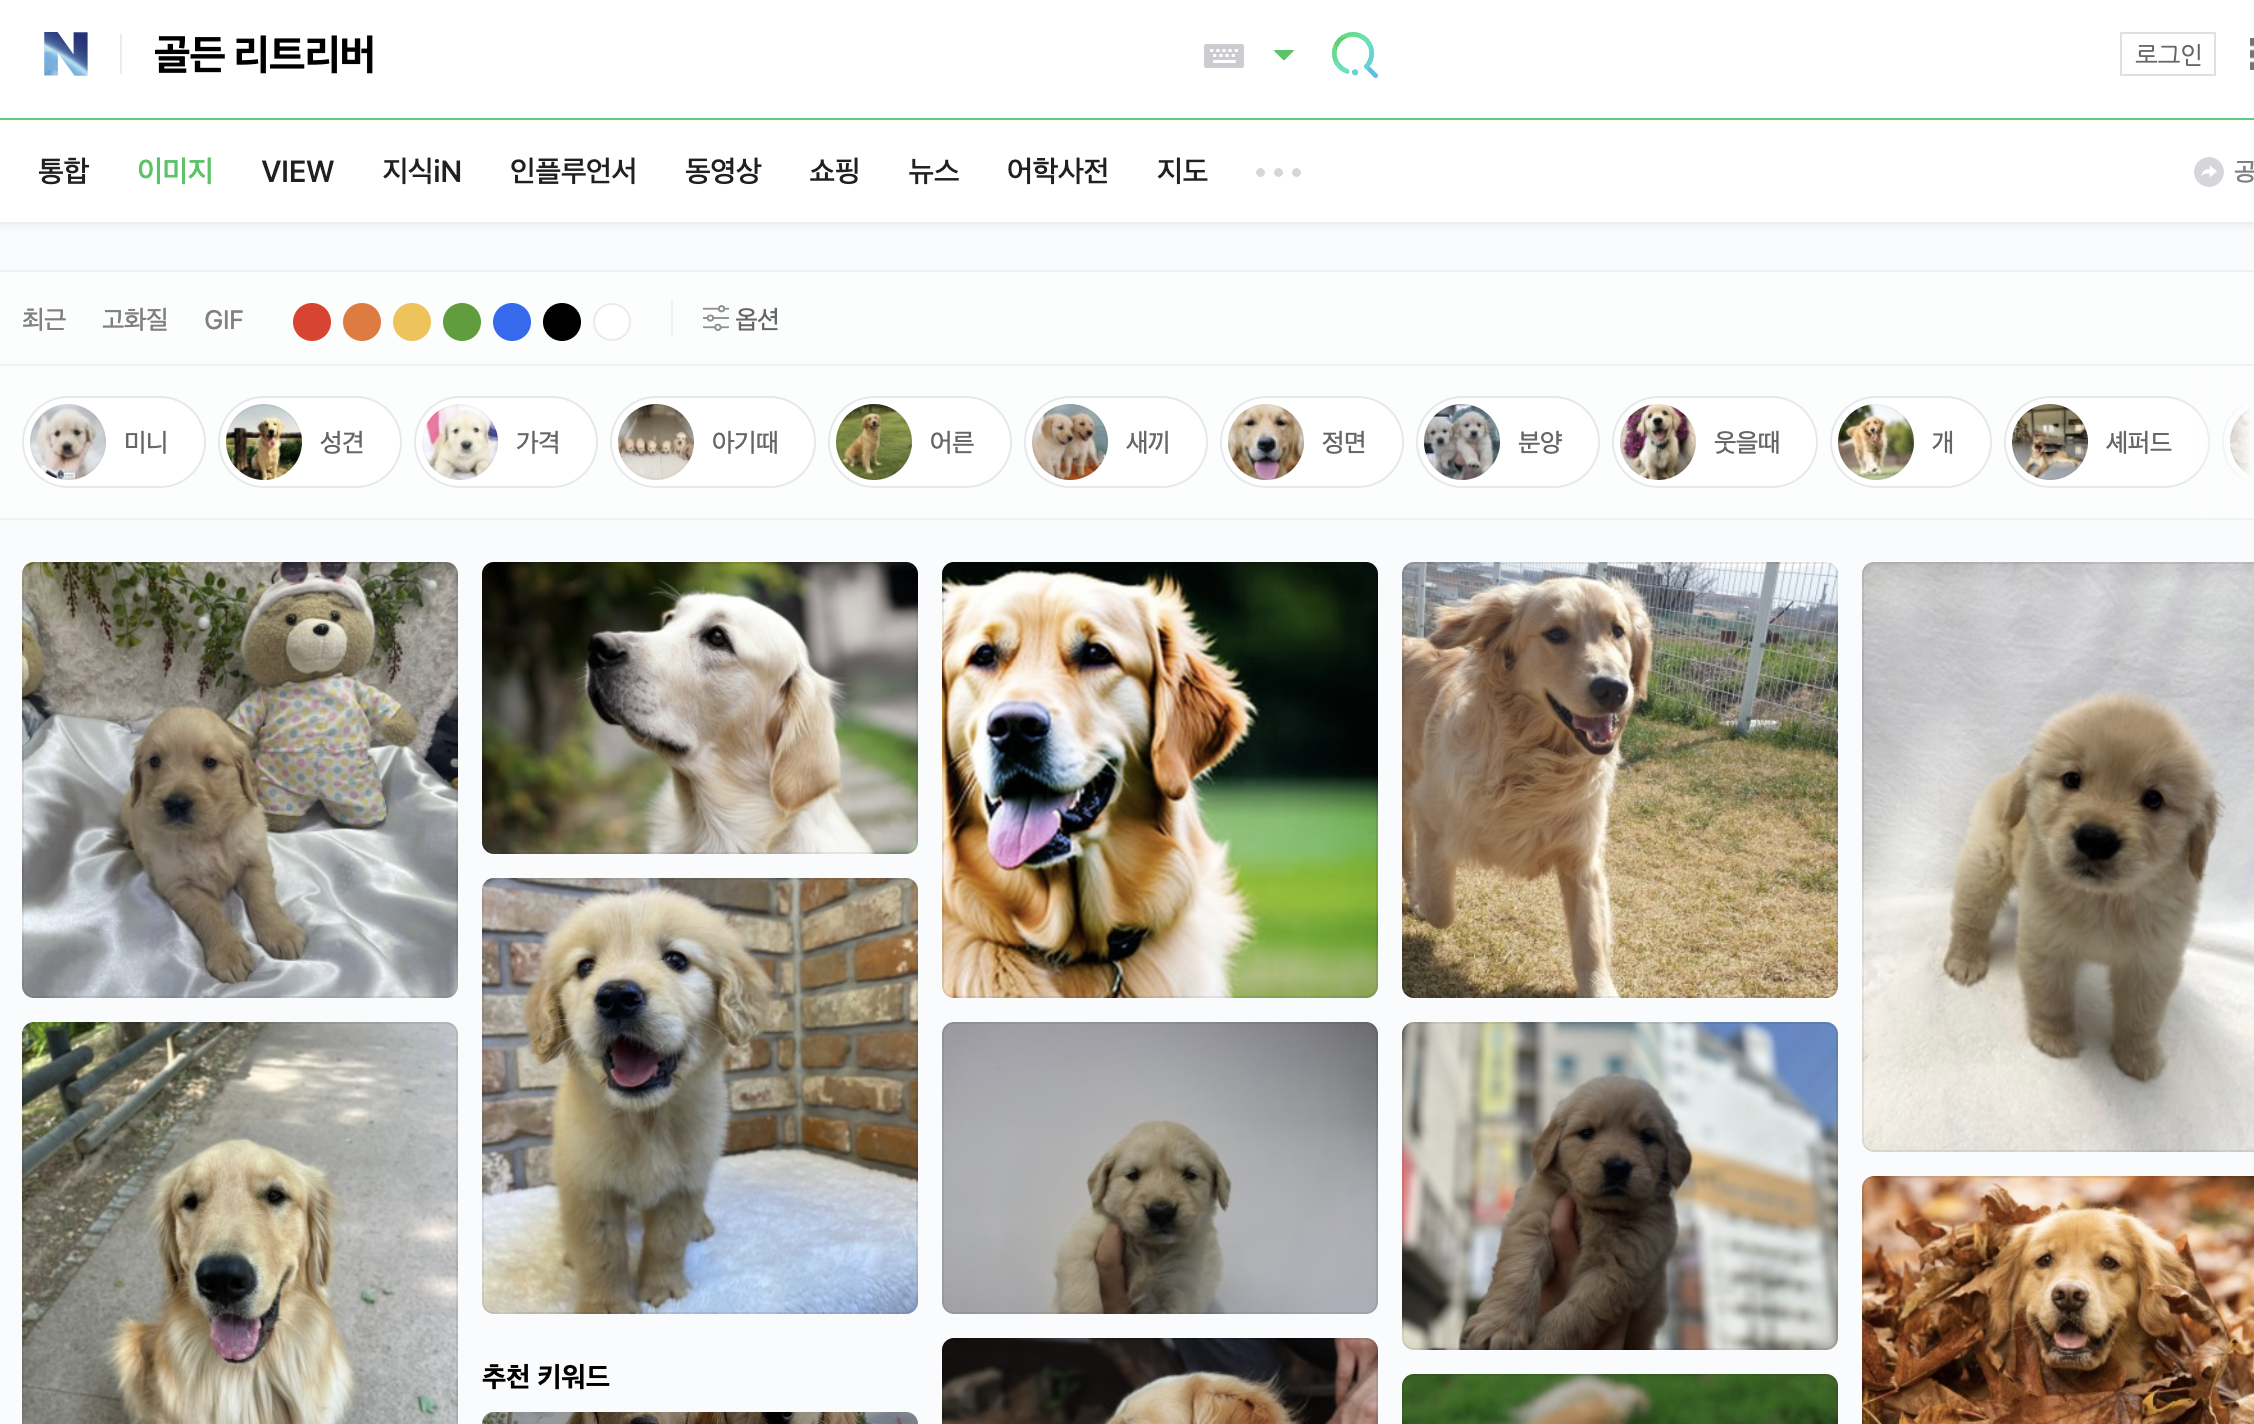

## 이미지 URL로 HTTP 요청 보내서 다운받기
파일을 열 때 "wb" 모드로 열면 "write binary" 모드로 바이너리 데이터를 쓰겠다는 의미입니다. image url을 requests를 이용해서 get을 하면 이미지의 바이너리를 읽어올 수 있습니다. 이를 파일에 써주면 이미지 파일을 크롤링 해올 수 있습니다.

In [6]:
import requests

img_url = "https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjA2MjhfMjIy%2FMDAxNjU2NDEzNjMyOTI0.pDw-Ykua5hVTg_5VVAb72_zCCVuoL4cerUKC7Iqo9Sgg.Qqs89-e04D8NkmoUSuEnfr05g7Mup2LYfHrylt19vQkg.JPEG.moons9740%2FKakaoTalk_20220628_194559619_04.jpg&type=a340"
resp = requests.get(img_url)

In [7]:
with open("./example.jpg", "wb") as fw:
    fw.write(resp.content)

## 네이버 이미지 검색 결과 페이지에서 이미지 URL 목록 가져오기

이제 네이버 이미지 검색 결과 페이지를 유심히 살펴보고, 이미지 URL들을 긁어오기만 하면 이미지 크롤러 개발 끝입니다. 단, 네이버의 이미지 검색 결과는 서버 사이드 렌더링 되어 내려오지만, HTML 코드 사이에 들어있는 것이 아니라 javascript 코드 사이에 들어 있습니다. 한번 postman으로 네이버 이미지 검색 페이지를 요청해보고, controller.start로 검색해서 그 안에 들어있는 데이터를 살펴보겠습니다.

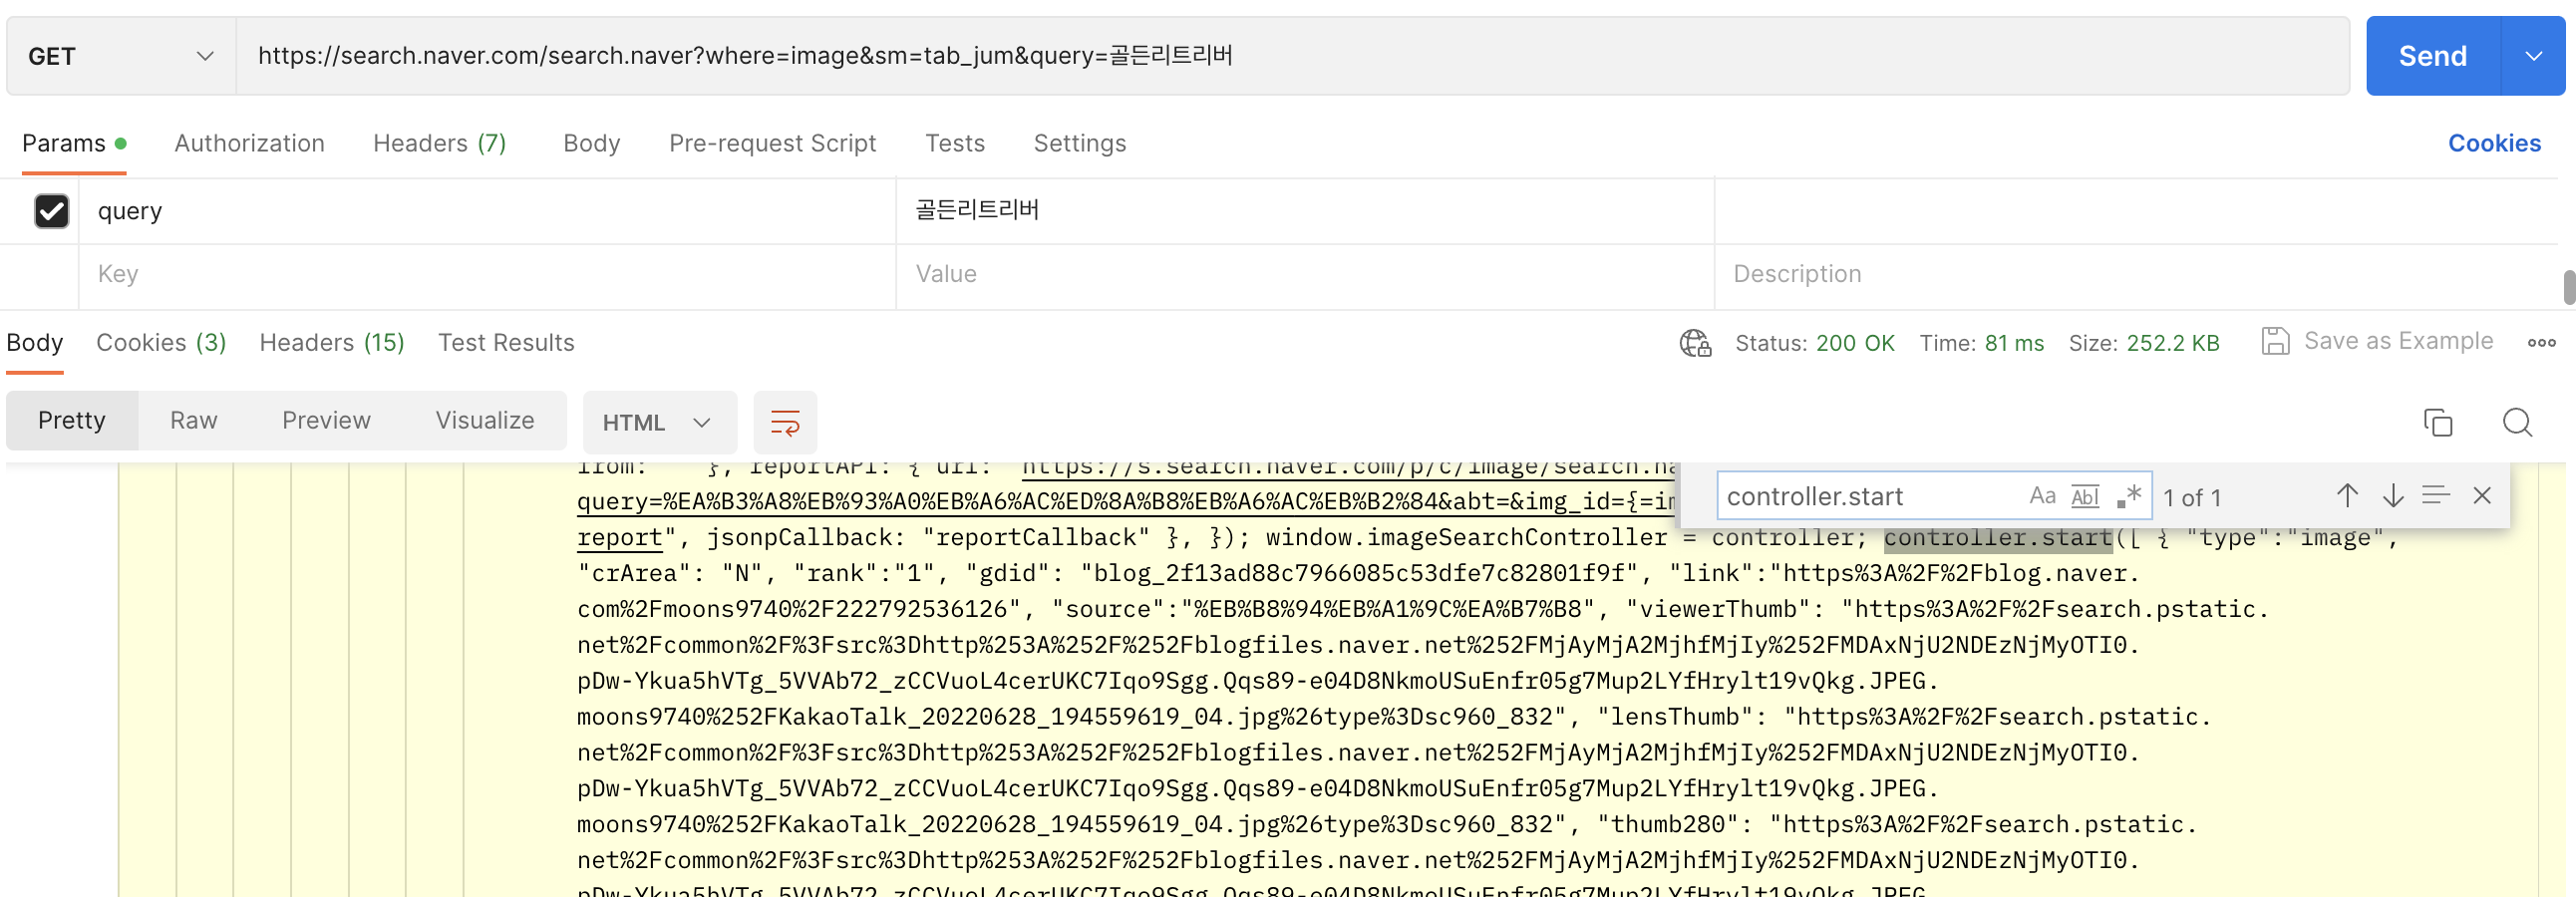

thumb280 아래에 있는 URL을 복사해서 url decode를 해준 뒤, postman으로 요청을 날려보겠습니다. 그러면 이미지를 잘 확인할 수 있습니다.

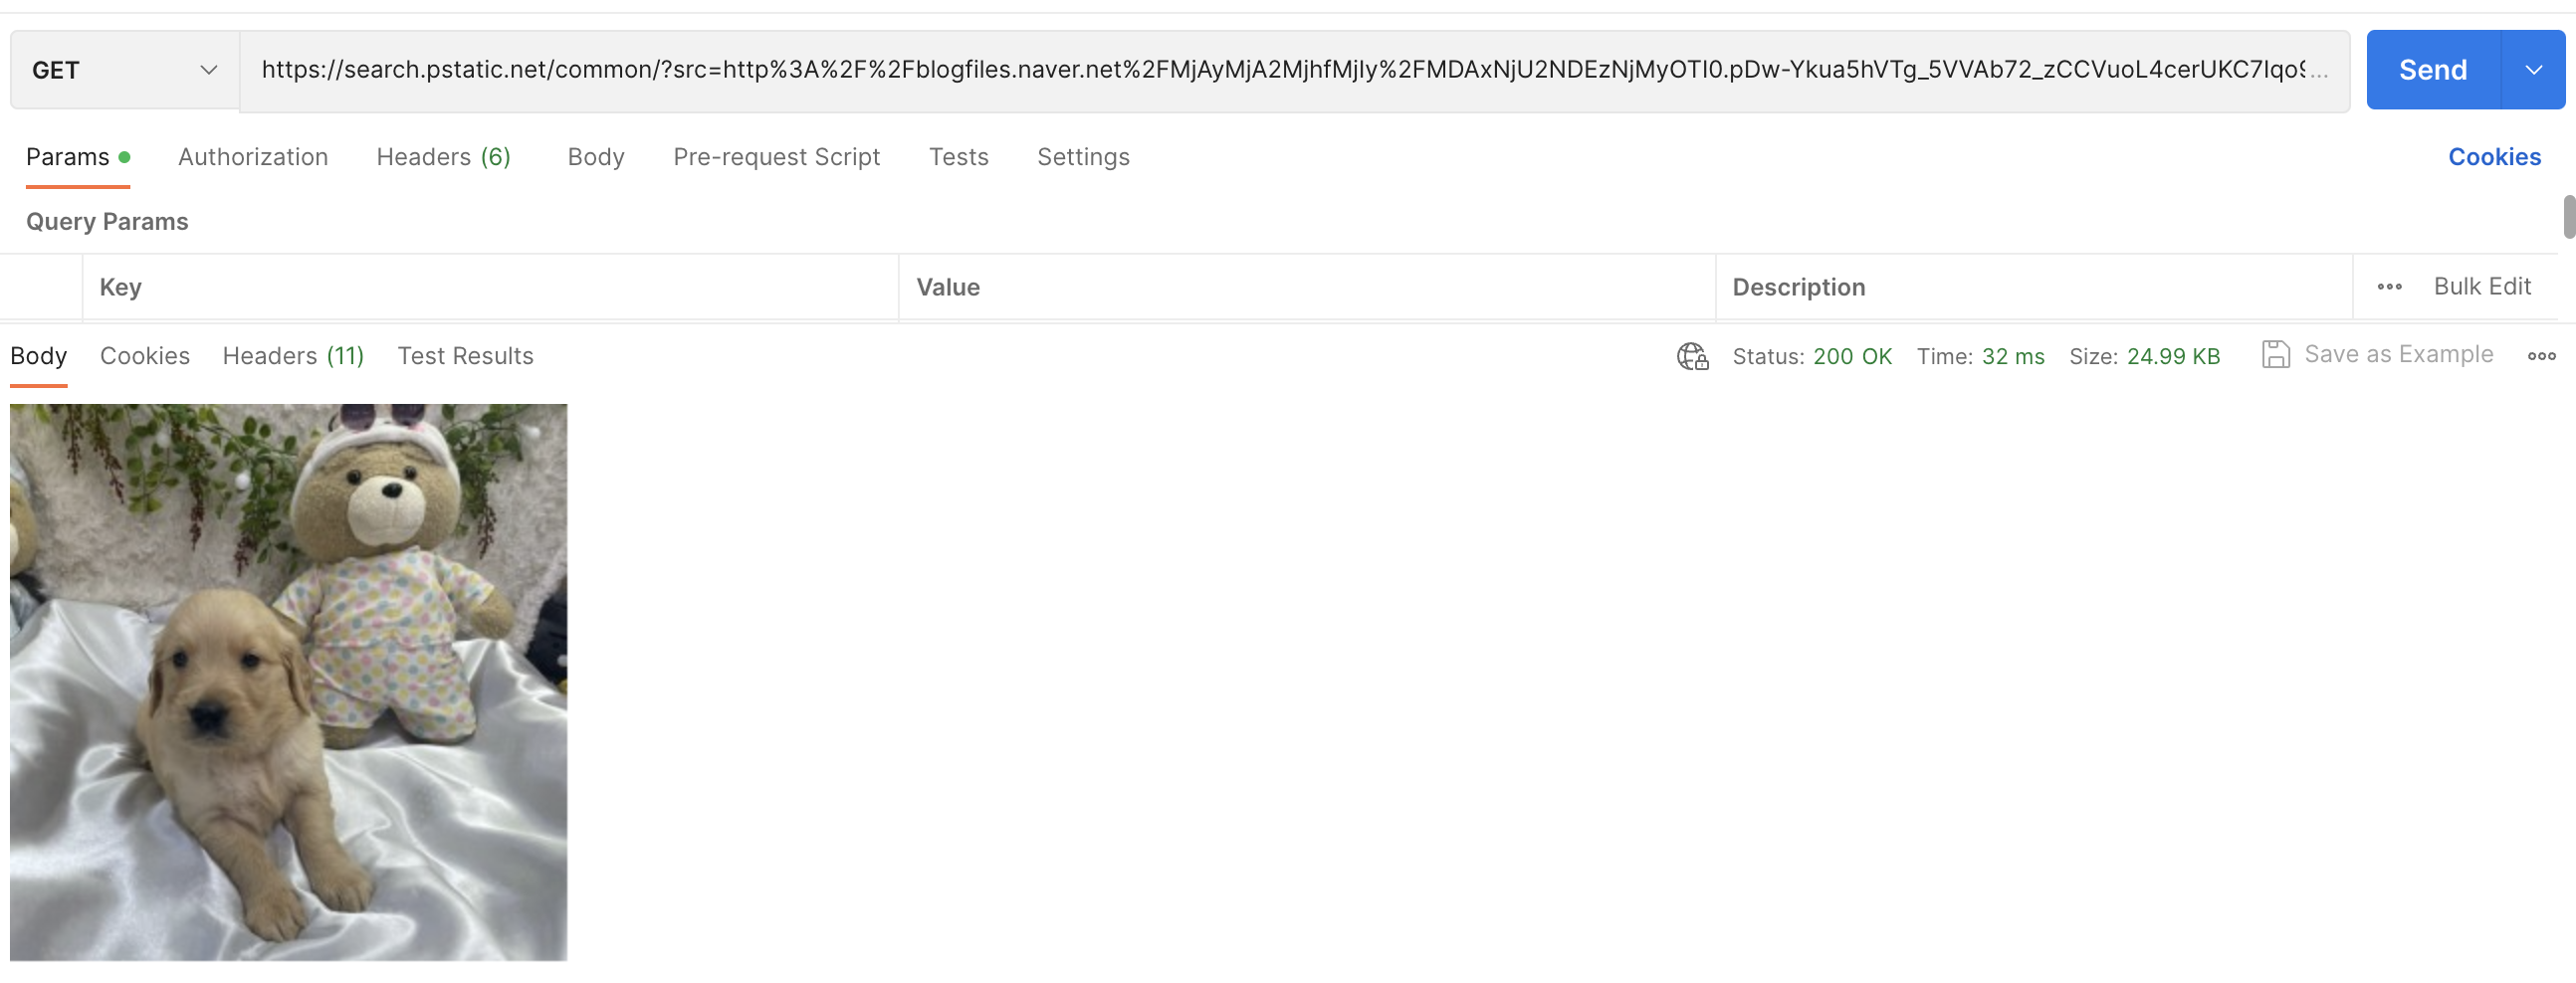

이런 케이스에는 BeautifulSoup을 이용해서 HTML 태그를 파싱하기 보단, 정규 표현식을 이용하여 텍스트를 파싱하면 됩니다. 정규표현식과 관련된 내용은 따로 다뤄보겠습니다. 

In [49]:
#  이미지 검색 결과 페이지 요청
url = "https://search.naver.com/search.naver?where=image&sm=tab_jum&query=골든리트리버&start=100"
resp = requests.get(url)

In [50]:
# 이미지 검색 결과 텍스트에서 정규 표현식을 이용해서 controller.start([  ]); 안에 들어있는 문자열을 추출

In [52]:
import re

pattern = r'controller\.start\(\[(.*?)\]\);'
data_str = re.findall(pattern, resp.text)[0]

In [53]:
# 문자열 형태의 데이터를 json 형태로 가공
import json

items = json.loads(f"[{data_str}]")

In [54]:
# thumb280 URL 들만 추출, unquote 함수는 url decode 역할을 수행
from urllib.parse import unquote 

unquote(items[0]["thumb280"])

'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMzAzMTJfNTUg%2FMDAxNjc4NjMyODM3NDE0.cbs3e01kVwWqdHDhqB0CUl0UC7F_D7WNroXvKagp4pYg.EMwcfTQhpwceLLWGDQyKp6FMh38V_SU1_YyTHwfoPPIg.JPEG.chaewood%2FKakaoTalk_20230312_223157640_26.jpg&type=b280'

In [55]:
image_urls = [unquote(item["thumb280"]) for item in items if item["type"] == "image"]

In [56]:
image_urls

['https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMzAzMTJfNTUg%2FMDAxNjc4NjMyODM3NDE0.cbs3e01kVwWqdHDhqB0CUl0UC7F_D7WNroXvKagp4pYg.EMwcfTQhpwceLLWGDQyKp6FMh38V_SU1_YyTHwfoPPIg.JPEG.chaewood%2FKakaoTalk_20230312_223157640_26.jpg&type=b280',
 'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjEyMTNfODkg%2FMDAxNjcwOTM3MTk3MDk1.muU3Yib3o5stejqJKIRNNdcfliJKTeBF03-1eAr_juYg.w-7UuweWKHokYWoSPRuk8brmcqYREjXXdkSCuRdGuTcg.JPEG.s8579%2F1670937173665.jpg&type=b280',
 'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMzAyMThfMTU3%2FMDAxNjc2Njk0NjUwMDIx.7JZKtBC2pr_F0mAJil211sjosO2H7cE6WK0wJpvz3t4g.dw_f4x9kUU4L7S20F8GpcATrMwa7tmOXscC2MLTochUg.JPEG.dkwkzld3%2F%25C5%25A9%25B1%25E2%25BA%25AF%25C8%25AFIMG_7357.JPG&type=b280',
 'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjEwMjRfMjgg%2FMDAxNjY2NjIxMDA5ODEw.4y2Mq0wpIuKsdv6qL8pQa11mump0q-bcfCLnmDjLEFog.J7GB59HGMEo40saxAUBpCriW3a50-ESaR

## 연습 문제
1. 지금까지 네이버에 특정 검색어를 입력한 페이지에서 이미지 URL을 파싱하는 로직을 알아보았습니다. 이를 이용하여 특정 검색어가 주어졌을 때, 5 페이지 검색 결과에 해당하는 이미지들을 모두 수집하는 크롤러를 python requests를 이용해서 개발해보세요. 검색 페이지를 요청할 때 start 파라미터를 넣어주면 뒷 페이지들도 가져올 수 있습니다. 데이터 수집에 걸리는 시간도 체크해보세요. 이미지 파일을 저장하는 이름은 자유롭게 지으셔도 무방합니다.

2. (심화 선택) 같은 크롤러를 python scrapy를 이용하여 개발해보세요. 그리고 성능 비교를 해보세요.